<h3>Task 1: Prediction using Supervised ML</h3>
<h4>By Jie Guang</h4>
<p>

<a href="http://bit.ly/w-data">Link to Data</a>

1. Predict <ins>score of student (In Percentage)</ins>, based on <ins>number of study hours</ins>

2. Predict score if student studies for 9.25 Hours each day

</p>

<h6>
Task Submission:

1. Host on Public Git Repo
2. Record Code in video, post on youtube
3. Share link of code & video, on LinkedIn Profile
4. Submit LinkedIn link in task submission form

</h6>


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Data
studentData = pd.read_csv("TSF_Data1.csv")
studentData.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check for any null values
studentData.info()

# Find summary statistics
studentData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot: xlabel='Hours'>

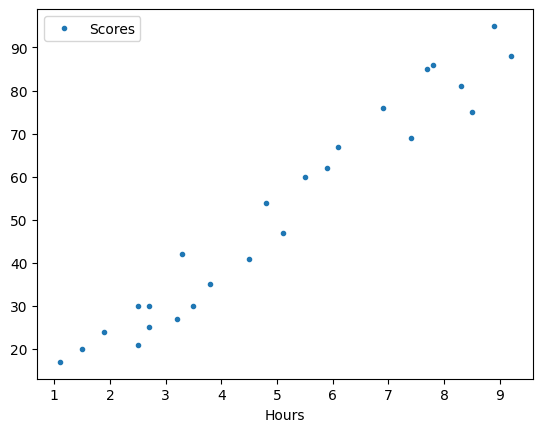

In [4]:
# Plot Data
studentData.plot(x = "Hours", y = "Scores", style = ".")

In [5]:
# Check correlation between variable
studentData.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
# Set Response and Predictor 
y = pd.DataFrame(studentData["Scores"])
x = pd.DataFrame(studentData["Hours"])

b = [2.60270577]
a = [[9.76200595]]


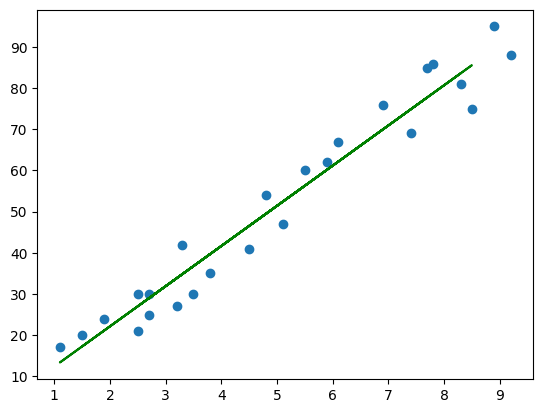

In [7]:
# Split data into 3:1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Fit into LinReg
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Plot train data
regline_x = x_train

print(f"b = {linreg.intercept_}")
print(f"a = {linreg.coef_}")
regline_y = linreg.coef_ * x_train + linreg.intercept_


plt.scatter(x, y)
plt.plot(regline_x, regline_y, color = "green")

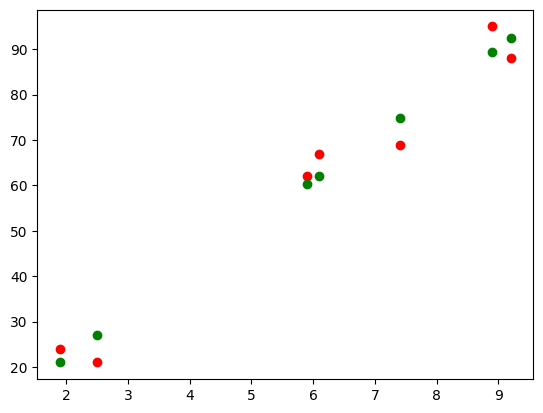

In [8]:
# Predict test
y_test_pred = linreg.predict(x_test)

# Actual
plt.scatter(x_test, y_test, color = "red")
# Predicted
plt.scatter(x_test, y_test_pred, color = "green")

In [9]:
# Predict when student studies 9.25 hrs
no_of_hours = 9.25
print(f"Predicted score when student studies: {no_of_hours} Hours")
print(f"Score: {linreg.predict([[no_of_hours]])}")

Predicted score when student studies: 9.25 Hours
Score: [[92.9012608]]


c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# R^2 (Explained Variance) of model to check goodness of fit
print(f"R^2 of train set: {linreg.score(x_train, y_train)}")
print(f"R^2 of test set: {linreg.score(x_test, y_test)}")

# Higher number is better fit

R^2 of train set: 0.9405265104308008
R^2 of test set: 0.9687194492485852
